# Importing Libraries and Pre-Processing Data

In [31]:
import h5py
import imageio as img
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
# Open the HDF5 file
file = h5py.File('/kaggle/input/dataset/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5', 'r')
file1 = h5py.File('/kaggle/input/dataset2/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5','r')
# Now you can read datasets from the file
data1 = file['/X']
y1 = file['/y']
data2 = file1['/X']
y2=file1['/y']
x1train = data1[:199200]
y1train = y1[:199200]
x1test = data1[199200:]
y1test= y1[199200:]
x2train = data2[:199200]
y2train = y2[:199200]
x2test = data2[199200:]
y2test= y2[199200:]
x_train = np.concatenate((x1train, x2train), axis=0)
x_test = np.concatenate((x1test, x2test), axis=0)
y_train = np.concatenate((y1train, y2train), axis=0)
y_test = np.concatenate((y1test, y2test), axis=0)

x_train.shape

(398400, 32, 32, 2)

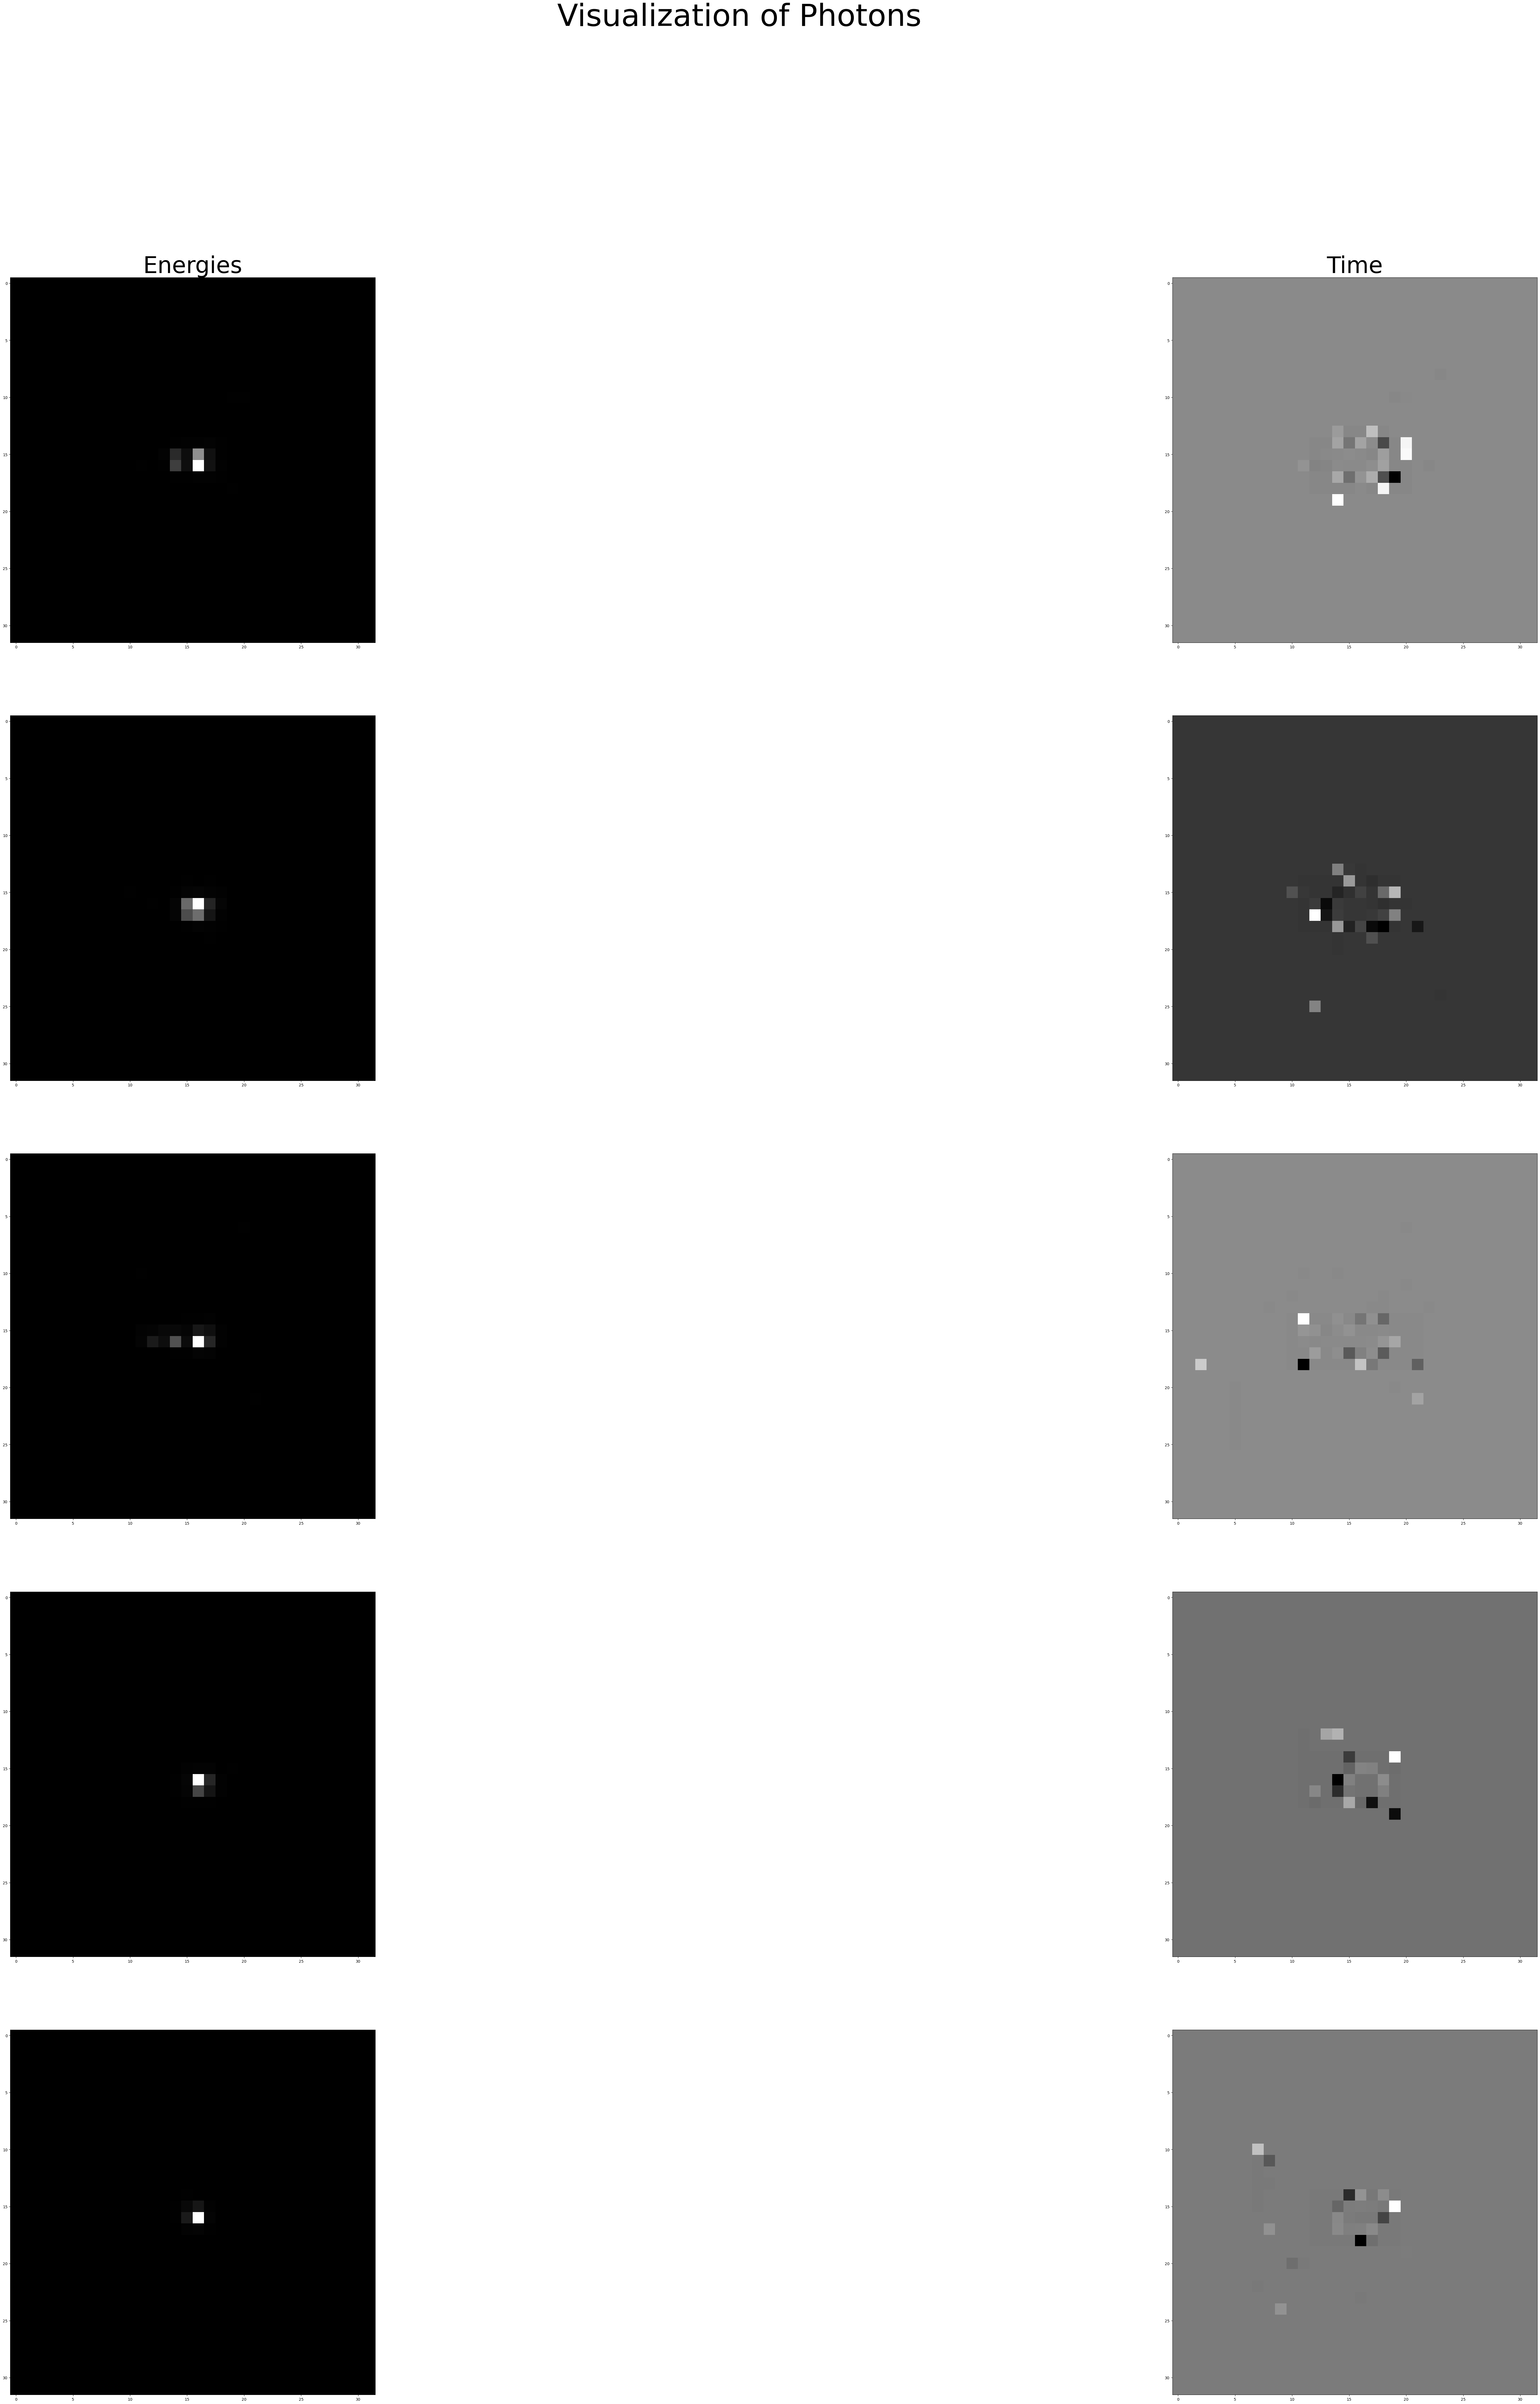

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(100, 100))

# Set title for the entire figure
fig.suptitle('Visualization of Photons', fontsize=80)

# Set titles for each column
axes[0][0].set_title('Energies', fontsize=60)
axes[0][1].set_title('Time', fontsize=60)

# Plot first 5 samples
for i in range(5):
    axes[i][0].imshow(x_train[i, :, :, 0], cmap='gray')
    axes[i][1].imshow(x_train[i, :, :, 1], cmap='gray')




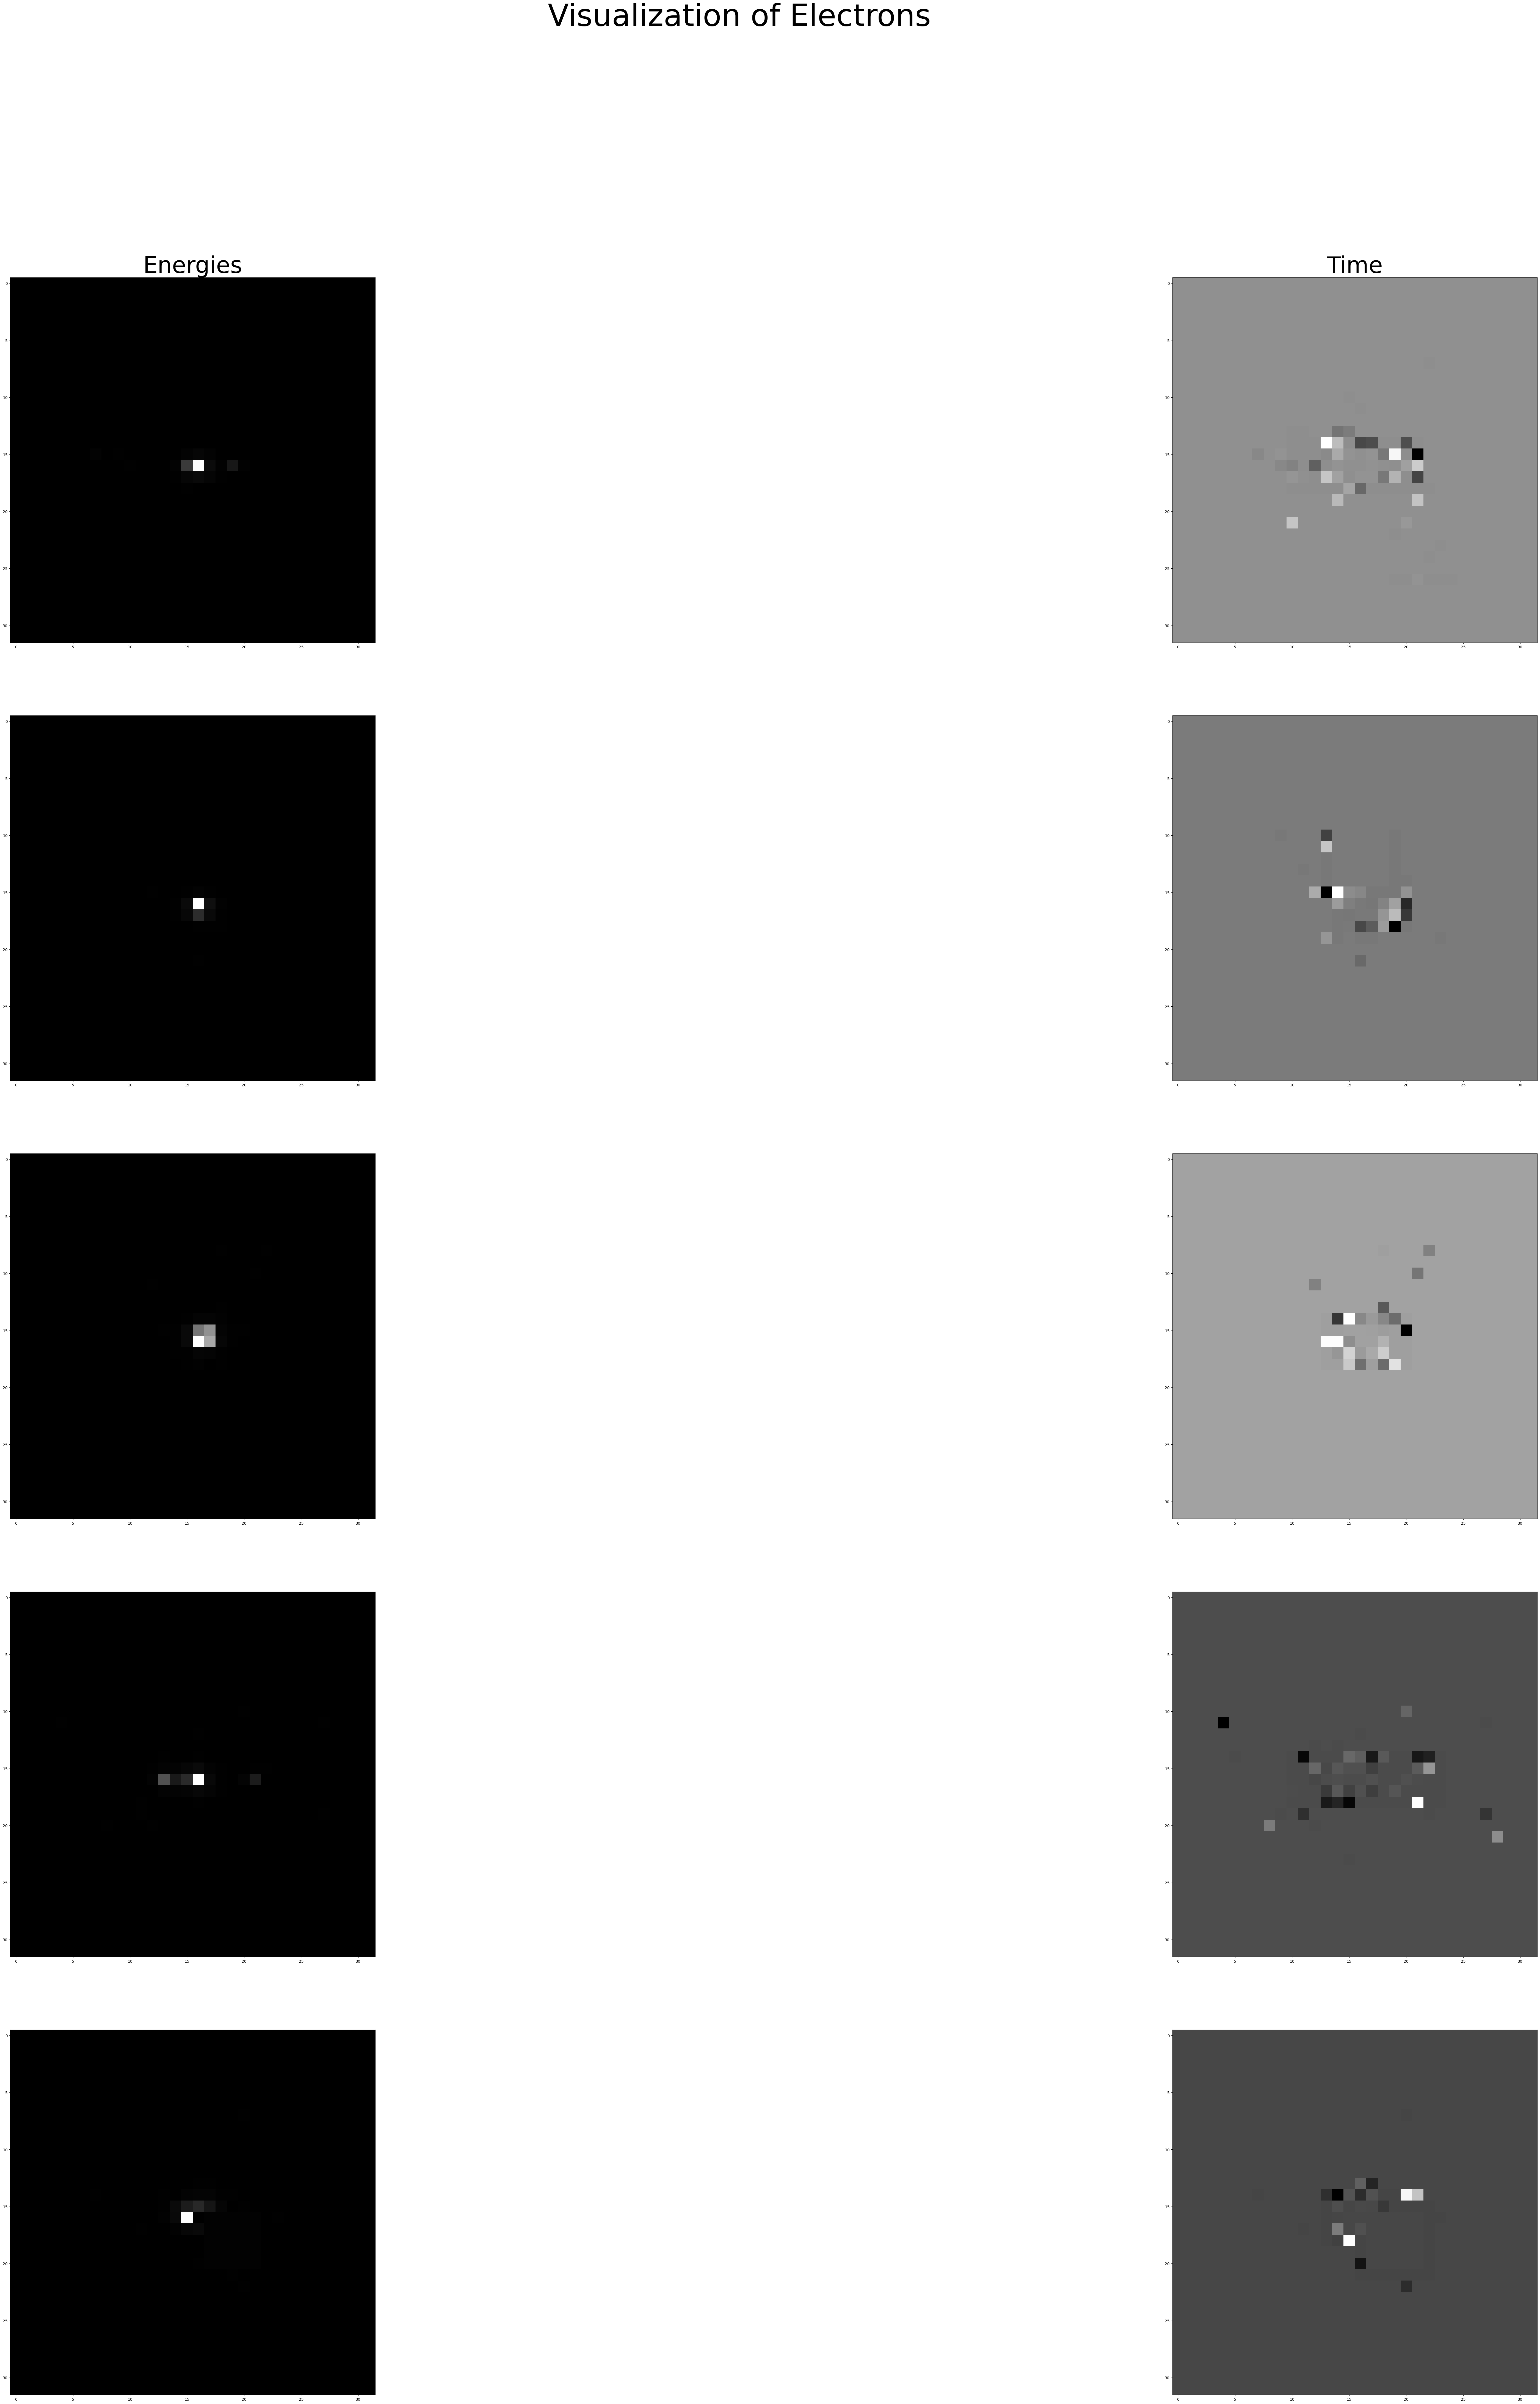

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(100, 100))

# Set title for the entire figure
fig.suptitle('Visualization of Electrons', fontsize=80)

# Set titles for each column
axes[0][0].set_title('Energies', fontsize=60)
axes[0][1].set_title('Time', fontsize=60)

# Plot first 5 samples
for i in range(5):
    axes[i][0].imshow(x_train[199200+i, :, :, 0], cmap='gray')
    axes[i][1].imshow(x_train[199200+i, :, :, 1], cmap='gray')

# Set title for the next row

plt.show()

# Models

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def res_block(x, filters, stride=1):
    shortcut = x
    if stride != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride,padding='same')(x)

    x = layers.Conv2D(filters, 3, strides=stride,padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3,padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x


def resnet15(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(80, 7, strides=2)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2)(x)

    for _ in range(2):
        x = res_block(x, 60)
    for _ in range(2):
        x = res_block(x, 20, 2)
    for _ in range(2):
        x = res_block(x, 10, 2)
    


    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(50,activation = 'relu')(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    return Model(inputs, outputs)

model = resnet15((32,32,2),1)


# Training

In [3]:
from keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
   21/12450 ━━━━━━━━━━━━━━━━━━━━ 1:36 8ms/step - accuracy: 0.5283 - loss: 0.7067

I0000 00:00:1711789389.281110     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12450/12450 ━━━━━━━━━━━━━━━━━━━━ 94s 6ms/step - accuracy: 0.5897 - loss: 0.6673 - val_accuracy: 0.5653 - val_loss: 0.6935
Epoch 2/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.6587 - loss: 0.6211 - val_accuracy: 0.6759 - val_loss: 0.6085
Epoch 3/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.6921 - loss: 0.5905 - val_accuracy: 0.6970 - val_loss: 0.5846
Epoch 4/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.7021 - loss: 0.5792 - val_accuracy: 0.7034 - val_loss: 0.5785
Epoch 5/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.7081 - loss: 0.5718 - val_accuracy: 0.7063 - val_loss: 0.5754
Epoch 6/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.7111 - loss: 0.5692 - val_accuracy: 0.7082 - val_loss: 0.5749
Epoch 7/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.7166 - loss: 0.5646 - val_accuracy: 0.7082 - val_loss: 0.5721
Epoch 8/25
12450/12450 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.7185 - lo

# ROC Curve

3113/3113 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


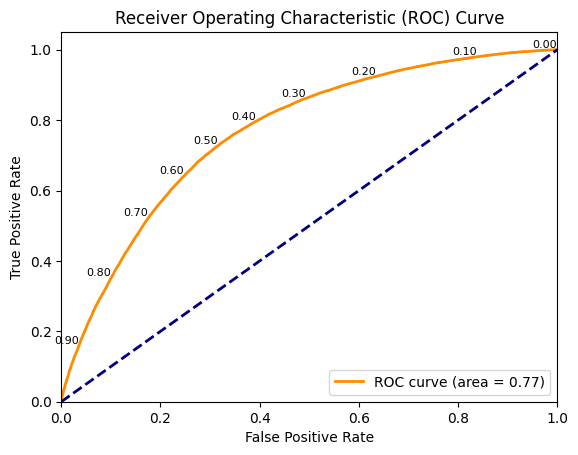

In [12]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_pred_prob is the predicted probabilities and y_actual is the actual labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Adding thresholds to the plot
threshold_labels = np.linspace(0, 1, num=10, endpoint=False)
for threshold in threshold_labels:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.text(fpr[idx], tpr[idx], f'{threshold:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.show()



# Prediction Accuracy

In [20]:
y_pred_c = y_pred>0.45
# Assuming y_pred and y_actual are arrays or lists containing predicted and actual values respectively
accuracy = accuracy_score(y_test, y_pred_c)
print("Accuracy:", accuracy)

Accuracy: 0.7055923694779116


In [22]:
model.save_weights('resnet15.weights.h5')


In [24]:
model = resnet15((32,32,2),1)
model.load_weights('resnet15.weights.h5')
y_pred = model.predict(x_test)
y_predc=y_pred>0.45
accuracy_score(y_predc,y_test)

3113/3113 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


0.7055923694779116

 # **Other variations used**

In [ ]:
def res_block(x, filters, stride=1):
    shortcut = x
    if stride != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(x)

    x = layers.Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x
def resnet15(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Split the input into two channels
    channel1 = inputs[..., 0:1]
    channel2 = inputs[..., 1:2]

    # Process the first channel
    x1 = layers.Conv2D(64, 7, strides=2, padding='same')(channel1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.MaxPooling2D(3, strides=2, padding='same')(x1)

    for _ in range(2):
        x1 = res_block(x1, 64)
    for _ in range(2):
        x1 = res_block(x1, 128, 2)
    for _ in range(2):
        x1 = res_block(x1, 256, 2)
    
    x1 = layers.Conv2D(512, 3, strides=2, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Activation('relu')(x1)

    x1 = layers.GlobalAveragePooling2D()(x1)

    # Process the second channel
    x2 = layers.Conv2D(64, 7, strides=2, padding='same')(channel2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Activation('relu')(x2)
    x2 = layers.MaxPooling2D(3, strides=2, padding='same')(x2)

    for _ in range(2):
        x2 = res_block(x2, 64)
    for _ in range(2):
        x2 = res_block(x2, 128, 2)
    for _ in range(2):
        x2 = res_block(x2, 256, 2)
    
    x2 = layers.Conv2D(512, 3, strides=2, padding='same')(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Activation('relu')(x2)

    x2 = layers.GlobalAveragePooling2D()(x2)

    # Combine the outputs of the two branches
    combined = layers.concatenate([x1, x2])
    outputs = layers.Dense(num_classes, activation='sigmoid')(combined)

    return Model(inputs, outputs)
model = resnet15((32,32, 2),1)


# Variant 2 Description:
I tested out many variations of resnet-15 including a resnet-15 that is first applied to the energies channel and then to the time channel, and then the answers are concatenated to produce a final output, however this approach didnt work as expected because it seems that there is some kind of relationship between energy and time which was ignored in this model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def res_block(x, filters, stride=1):
    shortcut = x
    if stride != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride,padding='same')(x)

    x = layers.Conv2D(filters, 3, strides=stride,padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3,padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x


def resnet15(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    channel1 = inputs[..., 0:1]
    channel2 = inputs[..., 1:2]
    x1 = layers.Conv2D(80, 7, strides=2)(channel1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.MaxPooling2D(3, strides=2)(x1)

    x2 = layers.Conv2D(80, 7, strides=2)(channel2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Activation('relu')(x2)
    x2= layers.MaxPooling2D(3, strides=2)(x2)
    for _ in range(2):
        x2 = res_block(x2, 60,2)
    for _ in range(2):
        x1 = res_block(x1, 20, 2)
    
    x1 = res_block(x1, 10, 2)
    x2 = res_block(x2, 10, 2)
    
    x1 = layers.GlobalAveragePooling2D()(x1)
    x2 = layers.GlobalAveragePooling2D()(x2)
    
    combined = layers.concatenate([x1, x2])
    outputs = layers.Dense(num_classes, activation='sigmoid')(combined)
    

    return Model(inputs, outputs)

model = resnet15((32,32,2),1)


# Variant 3 Description:
#As the resnet-15 was a big model for a 32x32 matrix, i tried to divide the model among the channels and the concatenate the output. However, this approach also didnt give good accuracy as a result it was confirmed that energy and time had a relation between them and need to be processed together.